# Created by:
## Shubhnoor Gill
## 18BCS6061
## B.E. CSE(AIML)-1
## Group-B

# Comparison of Activation Functions using MNIST Dataset

For this purpose, a simple ANN model was used for the MNIST dataset.
- Rectified Linear Unit(ReLU) Function
- Sigmoid Function
- Hyperbolic Tangent Function
- Swish Function
- Scaled Exponential Linear Unit (SELU) Function

The loss, validation, training accuracy for the different activation function with the respective plots is shown in this notebook.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.utils import np_utils # used for categorisation
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# Unpacking dataset into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# Data Pre-processing

n = X_train.shape[1] * X_train.shape[2] # flatten this array into a vector of  28×28=784
X_train = X_train.reshape(X_train.shape[0], n).astype('float32') #type to cast one or more of the DataFrame's columns to column-specific types.
X_test = X_test.reshape(X_test.shape[0], n).astype('float32')
X_train = X_train / 255 # convert into fully black and fully white
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train) # digits are 0-9, so we have 10 classes, one hot encoding
y_test = np_utils.to_categorical(y_test) #Converts a class vector (integers) to binary class matrix.
num_classes = y_test.shape[1]

In [5]:
X_train.shape 

(60000, 784)

In [6]:
X_test.shape

(10000, 784)

## Rectified Linear Unit (ReLU) Activation Function

In [7]:
RELU_model = Sequential()

RELU_model.add(Dense(500, input_dim=n, activation='relu'))

RELU_model.add(Dense(100, activation='relu'))

RELU_model.add(Dense(num_classes, activation='softmax'))

# Compile model

RELU_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
RELU_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


### Result of Train and Test

In [8]:
hist_relu=RELU_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores_relu = RELU_model.evaluate(X_test, y_test)
print('Test loss:', scores_relu[0])
print('Test accuracy:', scores_relu[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.2723 - accuracy: 0.9215 - val_loss: 0.1248 - val_accuracy: 0.9632
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0990 - accuracy: 0.9715 - val_loss: 0.0997 - val_accuracy: 0.9685
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0638 - accuracy: 0.9808 - val_loss: 0.0719 - val_accuracy: 0.9765
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.0623 - val_accuracy: 0.9797
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0613 - val_accuracy: 0.9811
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0237 - accuracy: 0.9929 - val_loss: 0.0711 - val_accuracy: 0.9786
Epoch 7/10
60000/60000 [==============================] - 2s 32us/st

## Sigmoid Activation Function

In [9]:
SIG_model = Sequential()

SIG_model.add(Dense(500, input_dim=n, activation='sigmoid'))

SIG_model.add(Dense(100, activation='sigmoid'))

SIG_model.add(Dense(num_classes, activation='softmax'))

# Compile model

SIG_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
SIG_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


### Result of Train and Test

In [10]:
hist_sig=SIG_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores_sig = SIG_model.evaluate(X_test, y_test)
print('Test loss:', scores_sig[0])
print('Test accuracy:', scores_sig[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.7180 - accuracy: 0.8184 - val_loss: 0.3013 - val_accuracy: 0.9162
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.2614 - accuracy: 0.9248 - val_loss: 0.2189 - val_accuracy: 0.9362
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1986 - accuracy: 0.9421 - val_loss: 0.1752 - val_accuracy: 0.9481
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1582 - accuracy: 0.9535 - val_loss: 0.1463 - val_accuracy: 0.9555
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1291 - accuracy: 0.9626 - val_loss: 0.1267 - val_accuracy: 0.9619
Epoch 6/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1059 - accuracy: 0.9690 - val_loss: 0.1075 - val_accuracy: 0.9669
Epoch 7/10
60000/60000 [==============================] - 2s 29us/st

## Hyperbolic Tangent Activation Function

In [11]:
HTan_model = Sequential()

HTan_model.add(Dense(500, input_dim=n, activation='tanh'))

HTan_model.add(Dense(100, activation='tanh'))

HTan_model.add(Dense(num_classes, activation='softmax'))

# Compile model

HTan_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
HTan_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


### Result of Train and Test

In [12]:
hist_htan=HTan_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores_htan =HTan_model.evaluate(X_test, y_test)
print('Test loss:', scores_htan[0])
print('Test accuracy:', scores_htan[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3003 - accuracy: 0.9115 - val_loss: 0.1729 - val_accuracy: 0.9491
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1475 - accuracy: 0.9576 - val_loss: 0.1285 - val_accuracy: 0.9631
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1041 - accuracy: 0.9700 - val_loss: 0.1025 - val_accuracy: 0.9705
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0806 - accuracy: 0.9764 - val_loss: 0.0925 - val_accuracy: 0.9730
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0616 - accuracy: 0.9821 - val_loss: 0.0827 - val_accuracy: 0.9749
Epoch 6/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0487 - accuracy: 0.9861 - val_loss: 0.0696 - val_accuracy: 0.9777
Epoch 7/10
60000/60000 [==============================] - 2s 30us/st

## Swish Activation Function

In [13]:
def swish(x):
    return x * keras.backend.sigmoid(x)

In [14]:
SWISH_model = Sequential()

SWISH_model.add(Dense(500, input_dim=n, activation=swish))

SWISH_model.add(Dense(100, activation=swish))

SWISH_model.add(Dense(num_classes, activation='softmax'))

# Compile model

SWISH_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
SWISH_model.summary()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


### Result of Train and Test

In [15]:
hist_swish=SWISH_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores_swish =SWISH_model.evaluate(X_test, y_test)
print('Test loss:', scores_swish[0])
print('Test accuracy:', scores_swish[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.2995 - accuracy: 0.9163 - val_loss: 0.1398 - val_accuracy: 0.9584
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1199 - accuracy: 0.9638 - val_loss: 0.1013 - val_accuracy: 0.9681
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0765 - accuracy: 0.9767 - val_loss: 0.0775 - val_accuracy: 0.9752
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0539 - accuracy: 0.9835 - val_loss: 0.0686 - val_accuracy: 0.9780
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0629 - val_accuracy: 0.9789
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0578 - val_accuracy: 0.9824
Epoch 7/10
60000/60000 [==============================] - 3s 47us/st

## Scaled Exponential Linear Unit (SELU) Activation Function

In [16]:
SELU_model = Sequential()

SELU_model.add(Dense(500, input_dim=n, activation='selu'))

SELU_model.add(Dense(100, activation='selu'))

SELU_model.add(Dense(num_classes, activation='softmax'))

# Compile model

SELU_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
SELU_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


### Result of Train and Test

In [17]:
hist_selu=SELU_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores_selu =SELU_model.evaluate(X_test, y_test)
print('Test loss:', scores_selu[0])
print('Test accuracy:', scores_selu[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3116 - accuracy: 0.9072 - val_loss: 0.1997 - val_accuracy: 0.9390
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1502 - accuracy: 0.9554 - val_loss: 0.1314 - val_accuracy: 0.9586
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1066 - accuracy: 0.9678 - val_loss: 0.1071 - val_accuracy: 0.9667
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0819 - accuracy: 0.9745 - val_loss: 0.1000 - val_accuracy: 0.9688
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0653 - accuracy: 0.9799 - val_loss: 0.0986 - val_accuracy: 0.9703
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0893 - val_accuracy: 0.9736
Epoch 7/10
60000/60000 [==============================] - 2s 30us/st

# Comparision of all 5 Activation Functions

In [18]:
test_loss=[scores_relu[0],scores_sig[0],scores_htan[0],scores_swish[0],scores_selu[0]]
test_acc=[scores_relu[1],scores_sig[1],scores_htan[1],scores_swish[1],scores_selu[1]]

df_scores=pd.DataFrame({'Test Loss':test_loss,'Test Accuracy':test_acc},index=['RELU','Sigmoid','TanH','Swish','SELU'])
df_scores

,Test Loss,Test Accuracy
RELU,0.069241,0.9792
Sigmoid,0.076433,0.9764
TanH,0.071251,0.9792
Swish,0.065430,0.9811
SELU,0.096148,0.9728


In [19]:
hists = [hist_htan, hist_sig, hist_relu, hist_swish, hist_selu]

In [20]:
def plot_history(hists, attribute, axis=(-1,10,0.85,0.94), loc='lower right'):
    title={'val_loss': 'Validation loss', 'loss': 'Training loss', 'val_accuracy': 'Validation accuracy', 'accuracy': 'Training accuracy'}
    num_hists=len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute], fontsize=25)  
    plt.ylabel(title[attribute])  
    plt.xlabel('Epochs')  
    plt.legend(['TanH', 'Sigmoid', 'ReLU', 'Swish', 'SELU'], loc=loc)  
    plt.show()

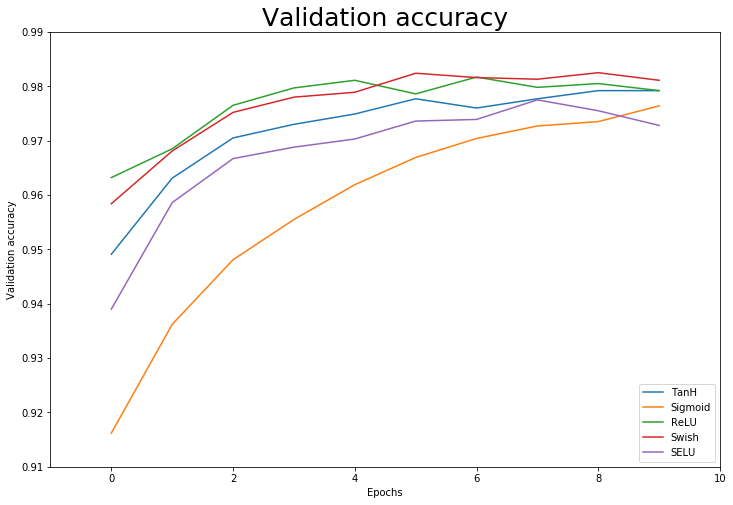

In [21]:
plot_history(hists, attribute='val_accuracy',axis=(-1,10,0.91,0.99), loc='lower right')

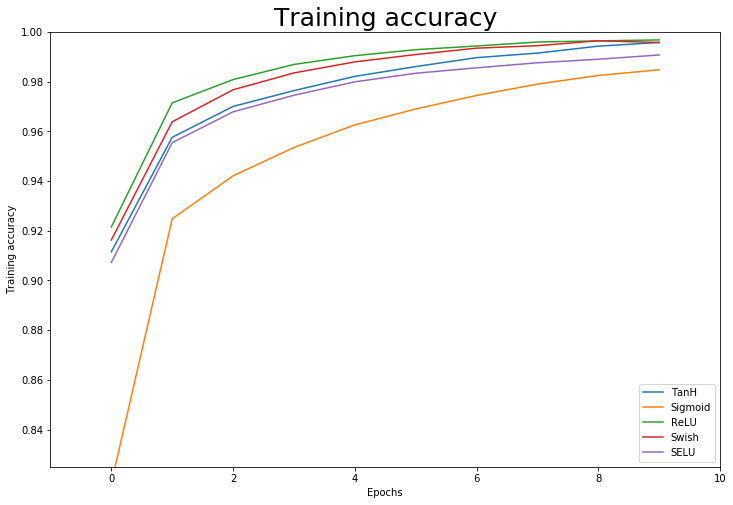

In [22]:
plot_history(hists, attribute='accuracy', axis=(-1,10,0.825,1), loc='lower right')

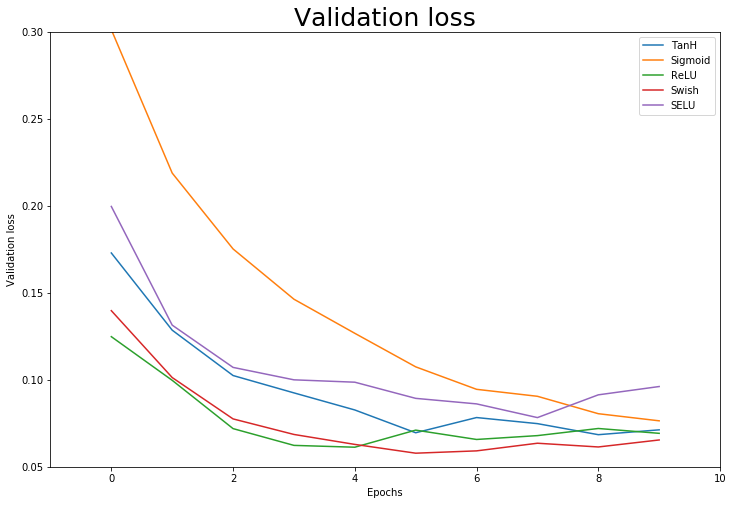

In [23]:
plot_history(hists, attribute='val_loss', axis=(-1,10,0.05,0.30), loc='upper right')

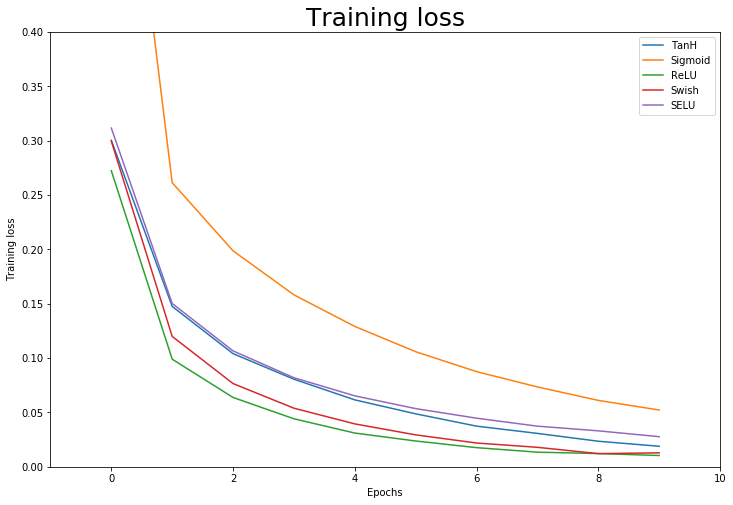

In [24]:
plot_history(hists, attribute='loss', axis=(-1,10,0.000,0.4), loc='upper right')

# Thank You